<h1>VESIcal: An open-source thermodynamic model engine for mixed volatile (H$_2$O-CO$_2$) solubility in silicate melts</h1>

<Kayla Iacovino$^1$, Simon Matthews$^{2,3}$, Penny Wieser$^4$, Gordon M. Moore$^1$, Florence Bégué$^5$

$^1$Jacobs, NASA Johnson Space Center, Houston, TX 77058, USA
<br>$^2$Johns Hopkins University, Department of Earth and Planetary Sciences, Baltimore, MD 21218, USA
<br>$^3$University of Iceland, Institute of Earth Sciences, Askja, Sturlugata 7, 101 Reykjavik, Iceland
<br>$^4$University of Cambridge, Department of Earth Sciences, Downing Street, Cambridge CB2 3EQ, UK
<br>$^5$University of Geneva, Department of Earth Sciences, Geneva, Switzerland>

# THIS NOTEBOOK IS FOR TESTING
This is a duplicate of the original manuscript notebook, but I have removed most of the explanatory text. On April 12, 2024, sample 19* started creashing the notebook when running the satPs_wTemps calculation. I wasn't able to figure out why, so I made this notebook, which calls in the example_data.xlsx file but without sample 19*.

### Initialize packages

For any code using the VESIcal library, the library must be imported for use. Here we import VESIcal as v. Any time we wish to initialize a VESIcal object, that class name must be preceded by '`v.`' (e.g., v.calculate_saturation_pressure). Specific examples of this usage follow. Here we also import some other python libraries that we will be using in the worked examples below.

In [1]:
import VESIcal as v
import pandas as pd

#The following are options for formatting this manuscript
pd.set_option('display.max_colwidth', 0)
from IPython.display import display, HTML
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
myfile = v.BatchFile('Supplement/Datasets/example_data_no19.xlsx')

**Table 3. User input data: Compositions, pressures, and temperatures for several silicate melts as supplied in the file 'example\_data.xlsx'**

In [3]:
data = myfile.get_data()
data

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,CaO,Na2O,K2O,P2O5,H2O,CO2,CITATION,ROCK TYPE,Press,Temp
Kil3-6_1a,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,0.0,0.0,9.892732,1.810522,0.352014,0.210479,0.424695,0.002873,Tucker et al. (2019),Basalt,62.5,1299
Kil3-6_3a,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,0.0,0.0,10.052578,2.268198,0.373328,0.204452,0.425984,0.006786,Tucker et al. (2019),Basalt,128.0,1283
Kil3-6_4a,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,0.0,0.0,10.308188,2.001863,0.396512,0.238996,0.437758,0.004984,Tucker et al. (2019),Basalt,100.0,1255
10*,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,0.0,0.0,12.230000,1.950000,0.210000,0.170000,4.500000,0.047900,Roggensack (2001),Basalt,2000.0,1200
25,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,0.0,0.0,12.780000,1.800000,0.240000,0.230000,5.200000,0.043700,Roggensack (2001),Basalt,2000.0,1200
SAT-M12-1,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,5.640000,4.050000,1.610000,0.240000,2.620000,0.000000,Moore et al. (1998),Andesite,703.0,1100
SAT-M12-2,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,5.640000,4.050000,1.610000,0.240000,5.030000,0.000000,Moore et al. (1998),Andesite,1865.0,1100
SAT-M12-4,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,5.640000,4.050000,1.610000,0.240000,6.760000,0.000000,Moore et al. (1998),Andesite,2985.0,1050
samp. P1968a,76.974880,0.085516,3.110636,0.00,0.0,4.788883,0.000000,12.549439,0.0,0.0,1.207910,0.138963,1.133084,0.000000,4.340000,0.007000,Myers et al. (2019),Rhyolite,300.0,900
samp. P1968b,76.943845,0.133125,3.169657,0.00,0.0,4.763435,0.000000,12.446403,0.0,0.0,1.231728,0.140993,1.170806,0.000000,5.850000,0.012300,Myers et al. (2019),Rhyolite,300.0,900


For the rest of this manuscript, data will be pulled from the `example_data.xlsx` file (Supplemental Dataset S1), which contains compositional information for basalts (Tucker et al., 2019; Roggensack, 2001), andesites (Moore et al., 1998), rhyolites (Mercer et al., 2015; Myers et al., 2019), and alkaline melts (phototephrite, basaltic-trachyandesite, and basanite from Iacovino et al., 2016). Several additional example datasets from the literature are available in the Supplement (Supplementary Datasets S2-S5; Table 4). These include experimentally produced alkaline magmas from Iacovino et al. (2016; `alkaline.xlsx`), basaltic melt inclusions from Kilauea (Tucker et al., 2019) and Gakkel Ridge (Bennett et al., 2019; `basalts.xlsx`), basaltic melt inclusions from Cerro Negro volcano, Nicaragua (Roggensack, 2001; `cerro_negro.xlsx`), and rhyolite melt inclusions from the Taupo Volcanic Center, New Zealand (Myers et al., 2019) and a topaz rhyolite from the Rio Grande Rift (Mercer et al., 2015; `rhyolites.xlsx`). Where available, the calibration datasets for VESIcal models are also provided (Supplementary Datasets S6-S7).

**Table 4. Example datasets included with VESIcal**

In [4]:
pd.read_excel("tables/Table_Example_Data.xlsx", index_col="Filename")

,Explanation,Compositions,Citations
Filename,,,
example_data.xlsx,Example data used in this manuscript,Wide comp. range,Iacovino et al. (2016); Mercer et al. (2015); Myers et al. (2019); Roggensack (2001); Tucker et al. (2019)
alkaline.xlsx,Experimental glasses,Basanite to Tephriphonolite,Iacovino et al. (2016)
basalts.xlsx,Melt inclusion glasses,Basaltic,Tucker et al. (2019); Bennett et al. (2019)
cerro_negro.xlsx,Melt inclusion glasses,Basaltic,Roggensack (2001)
rhyolites.xlsx,Melt inclusion glasses,Rhyolitic,Mercer et al. (2015); Myers et al. (2019)


In [5]:
mysample = v.Sample({'SiO2':  77.3,
             'TiO2':   0.08, 
             'Al2O3': 12.6,
             'Fe2O3':  0.207,
             'Cr2O3':  0.0,
             'FeO':    0.473,
             'MnO':    0.0,
             'MgO':    0.03,
             'NiO':    0.0,
             'CoO':    0.0,
             'CaO':    0.43,
             'Na2O':   3.98,
             'K2O':    4.88,
             'P2O5':   0.0,
             'H2O':    6.5,
             'CO2':    0.05})

To see the composition of mysample, use the `get_composition(species=None, normalization=None, units=None, exclude_volatiles=False, asSampleClass=False)` method. By default, the composition is returned exactly as input above. `species` can be set as an element or oxide (e.g., "Si" or "SiO$_2$")to return the float value for only that species. The composition can automatically be normalized using any of the standard normalization functions listed above and can be returned in any of the units discussed above. As with the `BatchFile.get_data()` function, a sample composition can be returned as a dictionary (default) or as a VESIcal Sample object (if `asSampleClass` is set to True).

In [6]:
mysample.get_composition()

SiO2     77.300
TiO2     0.080 
Al2O3    12.600
Fe2O3    0.207 
Cr2O3    0.000 
FeO      0.473 
MnO      0.000 
MgO      0.030 
NiO      0.000 
CoO      0.000 
CaO      0.430 
Na2O     3.980 
K2O      4.880 
P2O5     0.000 
H2O      6.500 
CO2      0.050 
dtype: float64

The oxides considered by VESIcal are:

In [7]:
print(v.oxides)

['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'Cr2O3', 'FeO', 'MnO', 'MgO', 'NiO', 'CoO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'H2O', 'CO2', 'F2O']


In [8]:
"""To get composition from a specific sample in the input data:"""
sample_10 = myfile.get_sample_composition('10*', asSampleClass=True)

"""To see the extracted sample composition, uncomment the line below by removing the # and execute this code cell"""
# sample_10.get_composition()

'To see the extracted sample composition, uncomment the line below by removing the # and execute this code cell'

In [9]:
"""Retrieve the standard normalization for one sample"""
mysample_normalized = mysample.get_composition(normalization="standard", asSampleClass=True)
#print(mysample_normalized.get_composition())

"""Retrieve the standard normalization for all samples in a BatchFile"""
myfile_normalized = myfile.get_data(normalization="standard", asBatchFile=True)
#print(myfile_normalized.get_data())

In [10]:
mybasalt = v.Sample({'SiO2': 47, 
                    'TiO2': 1.01,  
                    'Al2O3': 17.46,
                    'Fe2O3': 0.89,
                    'FeO': 7.18,
                    'MgO': 7.63,
                    'CaO': 12.44,
                    'Na2O': 2.65,
                    'K2O': 0.03,
                    'P2O5': 0.08, 
                    'CO2': 0.1})

We can apply each normalization routine to this sample and examine how this will affect the saturation pressure predicted by each model:

In [11]:
"""Normalize three ways"""
mybasalt_std = mybasalt.get_composition(normalization="standard", asSampleClass=True)
mybasalt_add = mybasalt.get_composition(normalization="additionalvolatiles", asSampleClass=True)
mybasalt_fix = mybasalt.get_composition(normalization="fixedvolatiles", asSampleClass=True)

"""Choose a model to test"""
mymodel = "IaconoMarziano"

for basalt, normtype in zip([mybasalt, mybasalt_std, mybasalt_add, mybasalt_fix],
                        ["Raw", "standard", "additionalvolatiles", "fixedvolatiles"]):
    print(str(normtype) + 
          " Saturation Pressure = " + 
          str(v.calculate_saturation_pressure(sample=basalt, temperature=1200, model=mymodel).result) + 
          " bars")

Raw Saturation Pressure = 1848.0344238069026 bars
standard Saturation Pressure = 1906.5480423917331 bars
additionalvolatiles Saturation Pressure = 1848.2699609182075 bars
fixedvolatiles Saturation Pressure = 1848.263700904032 bars


/Users/kiacovin/Dropbox/Research/_Published_Papers/2021_VESIcal/__TheCode/VESIcal_master/VESIcal/VESIcal/model_classes.py:382: RuntimeWarning: Species H2O not found in composition, assigning value of 0.0
  if (sample.get_composition(self.volatile_species[0]) <= 0.0 or
/Users/kiacovin/Dropbox/Research/_Published_Papers/2021_VESIcal/__TheCode/VESIcal_master/VESIcal/VESIcal/model_classes.py:382: RuntimeWarning: Species H2O not found in composition, assigning value of 0.0
  if (sample.get_composition(self.volatile_species[0]) <= 0.0 or
/Users/kiacovin/Dropbox/Research/_Published_Papers/2021_VESIcal/__TheCode/VESIcal_master/VESIcal/VESIcal/model_classes.py:382: RuntimeWarning: Species H2O not found in composition, assigning value of 0.0
  if (sample.get_composition(self.volatile_species[0]) <= 0.0 or
/Users/kiacovin/Dropbox/Research/_Published_Papers/2021_VESIcal/__TheCode/VESIcal_master/VESIcal/VESIcal/model_classes.py:382: RuntimeWarning: Species H2O not found in composition, assigning va

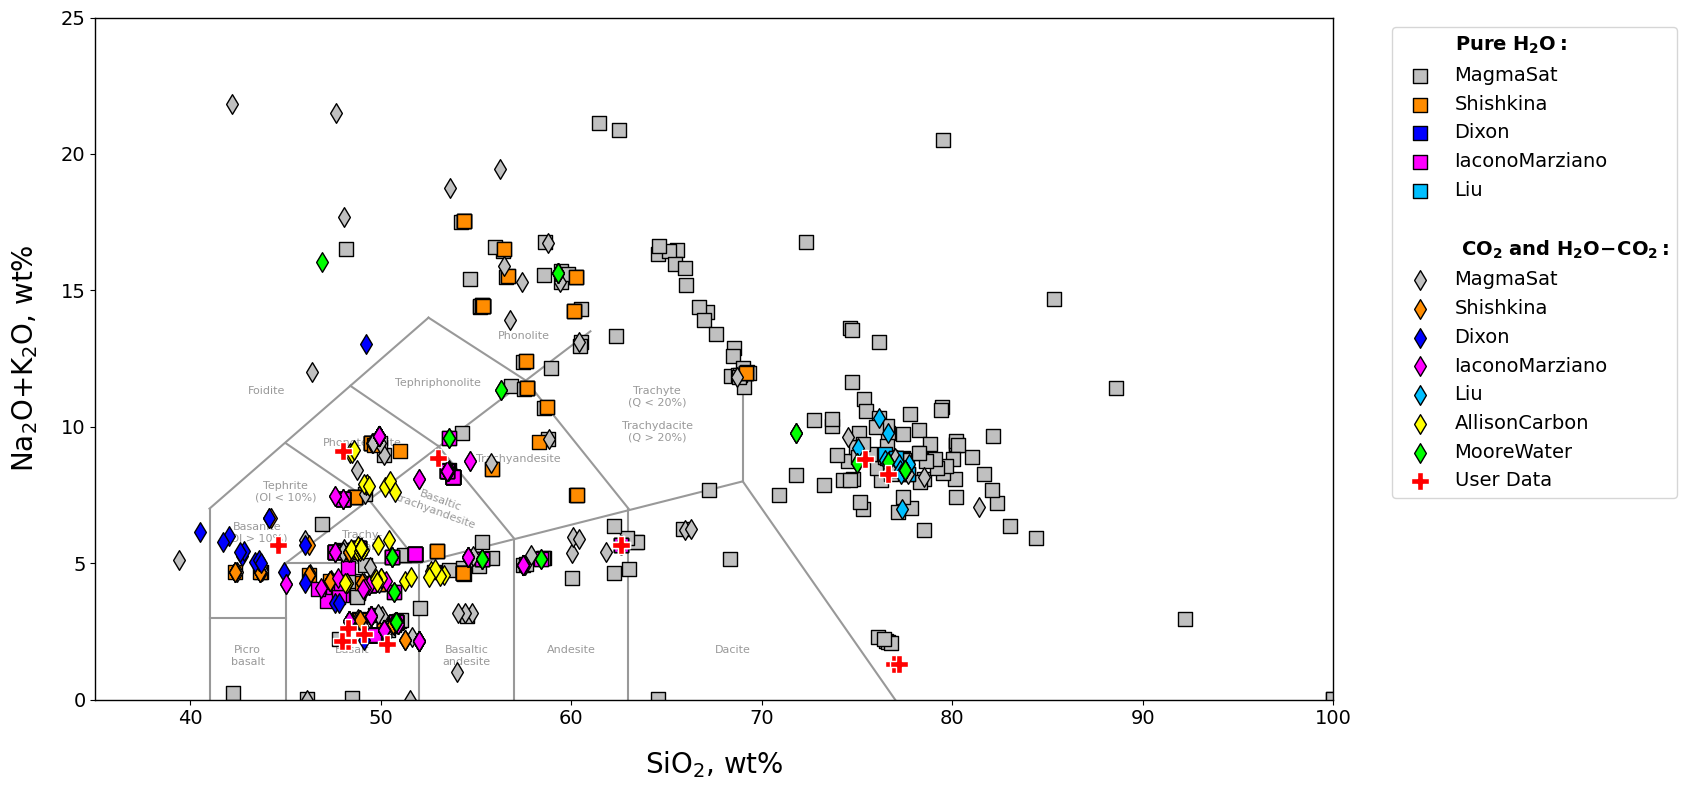

In [12]:
v.calib_plot(user_data=myfile)
v.show()

Figure 5b.

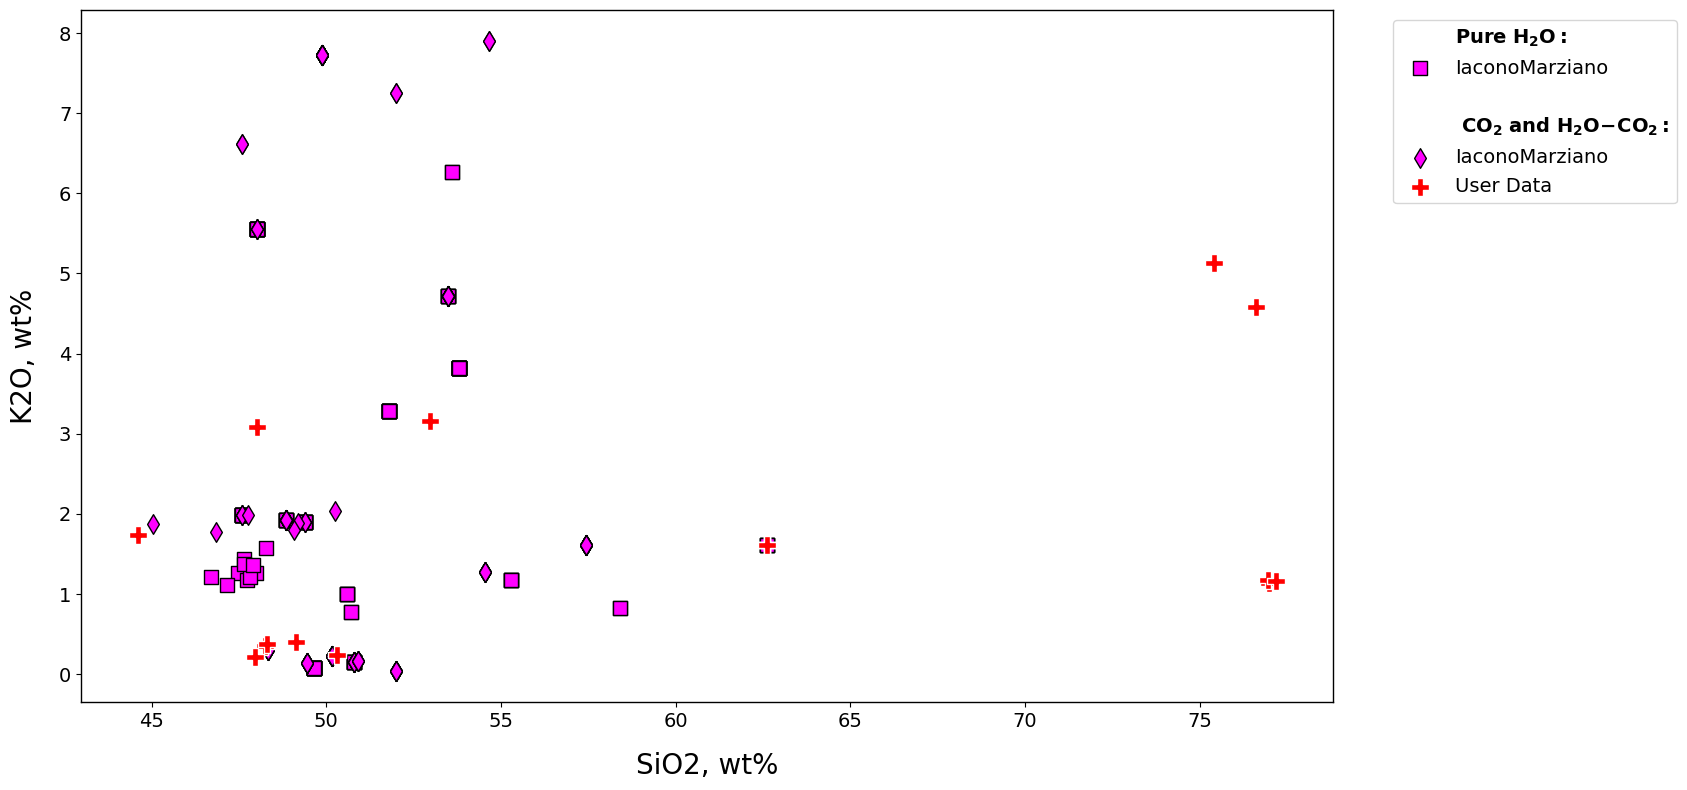

In [13]:
v.calib_plot(user_data=myfile, model='IaconoMarziano', plot_type='xy', x='SiO2', y='K2O', save_fig=False)
v.show()

*Figure 5: Example calibration plots. a. The default plot with user_data defined as myfile and no other options set. This produces a TAS digram with the user data plotted atop data from calibration datasets for all models. b. A plot with all options specified. This example produces an x-y plot for user_data (myfile) and the Iacono-Marziano calibration dataset where x and y are SiO*$_2$ *and K*$_2$*O concentration in wt%. Symbol shapes correspond to the volatile composition of experiments used to calibrate the model.*

In [14]:
"""Calculate dissolved volatiles for sample 10*"""
v.calculate_dissolved_volatiles(sample=sample_10, temperature=900.0, pressure=2000.0, 
                                X_fluid=0.5, verbose=True).result

{'H2O_liq': 2.69337030386574,
 'CO2_liq': 0.0638470697446765,
 'XH2O_fl': 0.500053772677827,
 'XCO2_fl': 0.499946227322173,
 'FluidProportion_wt': 0.19679860317100492}

In [15]:
"""Calculate dissolved for all samples in an BatchFile object"""
dissolved = myfile.calculate_dissolved_volatiles(temperature=900.0, pressure=2000.0, X_fluid=1, print_status=True)

[=====               ] 25%  Working on sample 10*                                  

**Table 5. Modeled dissolved volatile concentrations**

In [ ]:
dissolved

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,ROCK TYPE,Press,Temp,H2O_liq_VESIcal,CO2_liq_VESIcal,Temperature_C_VESIcal,Pressure_bars_VESIcal,X_fluid_input_VESIcal,Model,Warnings
Kil3-6_1a,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,0.0,0.0,...,Basalt,62.5,1299,5.256561,0.0,900.0,2000.0,1,MagmaSat,
Kil3-6_3a,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,0.0,0.0,...,Basalt,128.0,1283,5.417720,0.0,900.0,2000.0,1,MagmaSat,
Kil3-6_4a,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,0.0,0.0,...,Basalt,100.0,1255,5.353421,0.0,900.0,2000.0,1,MagmaSat,
10*,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,0.0,0.0,...,Basalt,2000.0,1200,4.984021,0.0,900.0,2000.0,1,MagmaSat,
19*,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,0.0,0.0,...,Basalt,2000.0,1200,5.134419,0.0,900.0,2000.0,1,MagmaSat,
25,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,0.0,0.0,...,Basalt,2000.0,1200,5.189068,0.0,900.0,2000.0,1,MagmaSat,
SAT-M12-1,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,Andesite,703.0,1100,5.810439,0.0,900.0,2000.0,1,MagmaSat,
SAT-M12-2,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,Andesite,1865.0,1100,5.810439,0.0,900.0,2000.0,1,MagmaSat,
SAT-M12-4,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,Andesite,2985.0,1050,5.810439,0.0,900.0,2000.0,1,MagmaSat,
samp. P1968a,76.974880,0.085516,3.110636,0.00,0.0,4.788883,0.000000,12.549439,0.0,0.0,...,Rhyolite,300.0,900,6.484749,0.0,900.0,2000.0,1,MagmaSat,


In [ ]:
"""Calculate fluid composition for the extracted sample"""
v.calculate_equilibrium_fluid_comp(sample=sample_10, temperature=900.0, pressure=100.0).result

{'CO2': 0.0052346121751066, 'H2O': 0.994765387824893}

**Table 6. Isothermally modeled equilibrium fluid compositions**

In [ ]:
"""Calculate fluid composition for all samples in an BatchFile object"""
eqfluid = myfile.calculate_equilibrium_fluid_comp(temperature=900.0, pressure=1000.0)
eqfluid

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,CITATION,ROCK TYPE,Press,Temp,XH2O_fl_VESIcal,XCO2_fl_VESIcal,Temperature_C_VESIcal,Pressure_bars_VESIcal,Model,Warnings
Kil3-6_1a,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,0.0,0.0,...,Tucker et al. (2019),Basalt,62.5,1299,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions
Kil3-6_3a,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,0.0,0.0,...,Tucker et al. (2019),Basalt,128.0,1283,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions
Kil3-6_4a,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,0.0,0.0,...,Tucker et al. (2019),Basalt,100.0,1255,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions
10*,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,0.0,0.0,...,Roggensack (2001),Basalt,2000.0,1200,0.986103,0.013897,900.0,1000.0,MagmaSat,
19*,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,0.0,0.0,...,Roggensack (2001),Basalt,2000.0,1200,0.977100,0.022900,900.0,1000.0,MagmaSat,
25,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,0.0,0.0,...,Roggensack (2001),Basalt,2000.0,1200,0.990988,0.009012,900.0,1000.0,MagmaSat,
SAT-M12-1,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,Moore et al. (1998),Andesite,703.0,1100,1.000000,0.000000,900.0,1000.0,MagmaSat,
SAT-M12-2,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,Moore et al. (1998),Andesite,1865.0,1100,1.000000,0.000000,900.0,1000.0,MagmaSat,
SAT-M12-4,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,Moore et al. (1998),Andesite,2985.0,1050,1.000000,0.000000,900.0,1000.0,MagmaSat,
samp. P1968a,76.974880,0.085516,3.110636,0.00,0.0,4.788883,0.000000,12.549439,0.0,0.0,...,Myers et al. (2019),Rhyolite,300.0,900,0.989328,0.010672,900.0,1000.0,MagmaSat,


In [ ]:
"""Calculate fluid composition for all samples with unique pressure and temperature values for each sample.
Pressure and temperature values are taken from columns named "Press" and "Temp" in the example BatchFile"""

eqfluid_wtemps = myfile.calculate_equilibrium_fluid_comp(temperature='Temp', pressure='Press')
eqfluid_wtemps

/var/folders/r3/675zftxx1r794r3v5mst_hzm0000gp/T/ipykernel_79837/3056984433.py:4: UserWarning: Temperature for sample samp. HPR3-1_XL-3 is <=0. Skipping sample.
  eqfluid_wtemps = myfile.calculate_equilibrium_fluid_comp(temperature='Temp', pressure='Press')
/var/folders/r3/675zftxx1r794r3v5mst_hzm0000gp/T/ipykernel_79837/3056984433.py:4: UserWarning: Pressure for sample samp. HPR3-1_XL-4_INCL-1 is <=0. Skipping sample.
  eqfluid_wtemps = myfile.calculate_equilibrium_fluid_comp(temperature='Temp', pressure='Press')


,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,H2O,CO2,CITATION,ROCK TYPE,Press,Temp,XH2O_fl_VESIcal,XCO2_fl_VESIcal,Model,Warnings
Kil3-6_1a,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,0.0,0.0,...,0.424695,0.002873,Tucker et al. (2019),Basalt,62.5,1299,0.474057,0.525943,MagmaSat,
Kil3-6_3a,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,0.0,0.0,...,0.425984,0.006786,Tucker et al. (2019),Basalt,128.0,1283,0.000000,0.000000,MagmaSat,Sample not saturated at these conditions
Kil3-6_4a,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,0.0,0.0,...,0.437758,0.004984,Tucker et al. (2019),Basalt,100.0,1255,0.000000,0.000000,MagmaSat,Sample not saturated at these conditions
10*,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,0.0,0.0,...,4.500000,0.047900,Roggensack (2001),Basalt,2000.0,1200,0.922247,0.077753,MagmaSat,
19*,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,0.0,0.0,...,5.100000,0.111300,Roggensack (2001),Basalt,2000.0,1200,0.936878,0.063122,MagmaSat,
25,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,0.0,0.0,...,5.200000,0.043700,Roggensack (2001),Basalt,2000.0,1200,0.969888,0.030112,MagmaSat,
SAT-M12-1,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,2.620000,0.000000,Moore et al. (1998),Andesite,703.0,1100,1.000000,0.000000,MagmaSat,
SAT-M12-2,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,5.030000,0.000000,Moore et al. (1998),Andesite,1865.0,1100,1.000000,0.000000,MagmaSat,
SAT-M12-4,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,6.760000,0.000000,Moore et al. (1998),Andesite,2985.0,1050,1.000000,0.000000,MagmaSat,
samp. P1968a,76.974880,0.085516,3.110636,0.00,0.0,4.788883,0.000000,12.549439,0.0,0.0,...,4.340000,0.007000,Myers et al. (2019),Rhyolite,300.0,900,0.998809,0.001191,MagmaSat,


**Table 8. Equilibrium fluid compositions converted from mol fraction to wt%**

In [ ]:
"""Converting from mol fraction to wt%"""
eqfluid_wt = v.fluid_molfrac_to_wt(eqfluid)
eqfluid_wt

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,Press,Temp,XH2O_fl_VESIcal,XCO2_fl_VESIcal,Temperature_C_VESIcal,Pressure_bars_VESIcal,Model,Warnings,H2O_fl_wt,CO2_fl_wt
Kil3-6_1a,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,0.0,0.0,...,62.5,1299,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions,NaN,NaN
Kil3-6_3a,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,0.0,0.0,...,128.0,1283,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions,NaN,NaN
Kil3-6_4a,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,0.0,0.0,...,100.0,1255,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions,NaN,NaN
10*,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,0.0,0.0,...,2000.0,1200,0.986103,0.013897,900.0,1000.0,MagmaSat,,96.672684,3.327316
19*,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,0.0,0.0,...,2000.0,1200,0.977100,0.022900,900.0,1000.0,MagmaSat,,94.586092,5.413908
25,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,0.0,0.0,...,2000.0,1200,0.990988,0.009012,900.0,1000.0,MagmaSat,,97.827370,2.172630
SAT-M12-1,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,703.0,1100,1.000000,0.000000,900.0,1000.0,MagmaSat,,100.000000,0.000000
SAT-M12-2,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,1865.0,1100,1.000000,0.000000,900.0,1000.0,MagmaSat,,100.000000,0.000000
SAT-M12-4,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,2985.0,1050,1.000000,0.000000,900.0,1000.0,MagmaSat,,100.000000,0.000000
samp. P1968a,76.974880,0.085516,3.110636,0.00,0.0,4.788883,0.000000,12.549439,0.0,0.0,...,300.0,900,0.989328,0.010672,900.0,1000.0,MagmaSat,,97.433172,2.566828


**Table 9. Equilibrium fluid compositions converted from wt% to mol fraction**

In [ ]:
"""Converting from wt% to mol fraction"""
eqfluid_mol = v.fluid_wt_to_molfrac(eqfluid_wt)
eqfluid_mol

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,XH2O_fl_VESIcal,XCO2_fl_VESIcal,Temperature_C_VESIcal,Pressure_bars_VESIcal,Model,Warnings,H2O_fl_wt,CO2_fl_wt,XH2O_fl,XCO2_fl
Kil3-6_1a,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,0.0,0.0,...,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions,NaN,NaN,NaN,NaN
Kil3-6_3a,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,0.0,0.0,...,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions,NaN,NaN,NaN,NaN
Kil3-6_4a,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,0.0,0.0,...,0.000000,0.000000,900.0,1000.0,MagmaSat,Sample not saturated at these conditions,NaN,NaN,NaN,NaN
10*,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,0.0,0.0,...,0.986103,0.013897,900.0,1000.0,MagmaSat,,96.672684,3.327316,0.986103,0.013897
19*,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,0.0,0.0,...,0.977100,0.022900,900.0,1000.0,MagmaSat,,94.586092,5.413908,0.977100,0.022900
25,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,0.0,0.0,...,0.990988,0.009012,900.0,1000.0,MagmaSat,,97.827370,2.172630,0.990988,0.009012
SAT-M12-1,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,1.000000,0.000000,900.0,1000.0,MagmaSat,,100.000000,0.000000,1.000000,0.000000
SAT-M12-2,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,1.000000,0.000000,900.0,1000.0,MagmaSat,,100.000000,0.000000,1.000000,0.000000
SAT-M12-4,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,1.000000,0.000000,900.0,1000.0,MagmaSat,,100.000000,0.000000,1.000000,0.000000
samp. P1968a,76.974880,0.085516,3.110636,0.00,0.0,4.788883,0.000000,12.549439,0.0,0.0,...,0.989328,0.010672,900.0,1000.0,MagmaSat,,97.433172,2.566828,0.989328,0.010672


In [ ]:
"""Calculate the saturation pressure of the single sample we defined in Section 3.1.2 at 925 degrees C"""
v.calculate_saturation_pressure(sample=mysample, temperature=925.0, verbose=True).result

duanDriver-2: t = 1198.15, p = 17000, z = 3.20345, v = 1.87722, delv = 0, dx = -4.16212e-14, iter = 42
duanH2ODriver(b): t = 1198.15, p = 5000, z = 1.42775, v = 2.84463, delv = 0, dx = -2.40961e-14, iter = 41


{'SaturationP_bars': 2970.0,
 'FluidMass_grams': 0.0,
 'FluidProportion_wt': 0.0,
 'XH2O_fl': 0.836718475196933,
 'XCO2_fl': 0.163281524803067}

**Table 10. Isothermally modeled saturation pressures**

In [ ]:
"""Calculate the saturation pressure for all samples in an BatchFile object at 925 degrees C"""
satPs = myfile.calculate_saturation_pressure(temperature=925.0)
satPs

[=                   ] 6%  Working on sample Kil3-6_1a                            duanH2ODriver(b): t = 1198.15, p = 5000, z = 1.42775, v = 2.84463, delv = 0, dx = -2.40961e-14, iter = 41
duanDriver-2: t = 1198.15, p = 5000, z = 1.90592, v = 3.79735, delv = 0, dx = -4.28881e-14, iter = 41
[==                  ] 12%  Working on sample Kil3-6_3a                            duanH2ODriver(b): t = 1198.15, p = 5000, z = 1.42775, v = 2.84463, delv = 0, dx = -2.40961e-14, iter = 41
[===                 ] 18%  Working on sample Kil3-6_4a                            duanH2ODriver(b): t = 1198.15, p = 5000, z = 1.42775, v = 2.84463, delv = 0, dx = -2.40961e-14, iter = 41
[====                ] 24%  Working on sample 10*                            duanH2ODriver(b): t = 1198.15, p = 5000, z = 1.42775, v = 2.84463, delv = 0, dx = -2.40961e-14, iter = 41
[=====               ] 29%  Working on sample 19*                            duanH2ODriver(b): t = 1198.15, p = 5000, z = 1.42775, v = 2.84463, delv 

,SiO2,TiO2,Al2O3,Fe2O3,Cr2O3,FeO,MnO,MgO,NiO,CoO,...,Press,Temp,SaturationP_bars_VESIcal,Temperature_C_VESIcal,XH2O_fl_VESIcal,XCO2_fl_VESIcal,FluidMass_grams_VESIcal,FluidSystem_wt_VESIcal,Model,Warnings
Kil3-6_1a,48.249207,2.222114,11.692194,0.00,0.0,0.000000,0.079999,14.183817,0.0,0.0,...,62.5,1299,70.0,925.0,0.416371,0.583629,0.0,0.0,MagmaSat,
Kil3-6_3a,48.295691,2.165357,11.755584,0.00,0.0,0.000000,0.084045,13.403980,0.0,0.0,...,128.0,1283,130.0,925.0,0.215529,0.784471,0.0,0.0,MagmaSat,
Kil3-6_4a,49.124079,2.360984,12.172833,0.00,0.0,0.000000,0.098809,11.997699,0.0,0.0,...,100.0,1255,110.0,925.0,0.271685,0.728315,0.0,0.0,MagmaSat,
10*,47.960000,0.780000,18.770000,0.00,0.0,10.920000,0.150000,6.860000,0.0,0.0,...,2000.0,1200,2510.0,925.0,0.795267,0.204733,0.0,0.0,MagmaSat,
19*,49.640000,0.710000,18.050000,0.00,0.0,10.540000,0.190000,6.430000,0.0,0.0,...,2000.0,1200,3610.0,925.0,0.702085,0.297915,0.0,0.0,MagmaSat,
25,50.320000,0.720000,18.030000,0.00,0.0,10.110000,0.140000,5.650000,0.0,0.0,...,2000.0,1200,2750.0,925.0,0.836733,0.163267,0.0,0.0,MagmaSat,
SAT-M12-1,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,703.0,1100,550.0,925.0,1.000000,0.000000,0.0,0.0,MagmaSat,
SAT-M12-2,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,1865.0,1100,1590.0,925.0,1.000000,0.000000,0.0,0.0,MagmaSat,
SAT-M12-4,62.600000,0.630000,17.300000,2.01,0.0,2.010000,0.060000,2.650000,0.0,0.0,...,2985.0,1050,2550.0,925.0,1.000000,0.000000,0.0,0.0,MagmaSat,
samp. P1968a,76.974880,0.085516,3.110636,0.00,0.0,4.788883,0.000000,12.549439,0.0,0.0,...,300.0,900,1110.0,925.0,0.970538,0.029462,0.0,0.0,MagmaSat,


**Table 11. Modeled saturation pressures with unique temperatures** The warning “Bad temperature” indicates that no data (or 0.0 value data) was given for the temperature of that sample,
in which case the calculation of that sample is skipped.

In [ ]:
"""Calculate the saturation pressure for all samples in an BatchFile object, taking temperature
values from a column named "Temp" in the BatchFile"""
satPs_wtemps = myfile.calculate_saturation_pressure(temperature="Temp")
satPs_wtemps

[==                  ] 12%  Working on sample Kil3-6_3a                            duanDriver-2: t = 1556.15, p = 7000, z = 2.28565, v = 4.22472, delv = 0, dx = -1.14901e-13, iter = 39
[===                 ] 18%  Working on sample Kil3-6_4a                            duanDriver-2: t = 1528.15, p = 18000, z = 3.20562, v = 2.26276, delv = 0, dx = -6.1613e-14, iter = 38
duanDriver-2: t = 1528.15, p = 18000, z = 3.20343, v = 2.26122, delv = 0, dx = -5.73535e-14, iter = 38
duanDriver-2: t = 1528.15, p = 11000, z = 2.71875, v = 3.14034, delv = 0, dx = -2.37777e-14, iter = 41
[=====               ] 29%  Working on sample 19*                            duanDriver-2: t = 1473.15, p = 18000, z = 2.93699, v = 1.99853, delv = 0, dx = -2.84187e-14, iter = 43
duanDriver-2: t = 1473.15, p = 8000, z = 2.04948, v = 3.13787, delv = 0, dx = -3.20995e-14, iter = 34


: 

In [ ]:
"""Define all variables to be passed to the function for calculating isobars and isopleths"""
"""Define the temperature in degrees C"""
temperature = 1200.0

"""Define a list of pressures in bars:"""
pressures = [1000.0, 2000.0, 3000.0]

In [ ]:
isobars, isopleths = v.calculate_isobars_and_isopleths(sample=sample_10, 
                                            temperature=temperature,
                                            pressure_list=pressures,
                                            isopleth_list=[0.25,0.5,0.75]).result

Calculating isobar at 1000.0 bars
 done.                                                                                                                           
Calculating isobar at 2000.0 bars
 done.                                                                                                                           
Calculating isobar at 3000.0 bars
 done.                                                                                                                           
Done!


In [ ]:
temp = 1200 #temperature in °C

"""Calculate open, closed, and closed + 2 wt% initial vapor"""
closed_df = v.calculate_degassing_path(sample=sample_10, temperature=temp).result
open_df = v.calculate_degassing_path(sample=sample_10, temperature=temp, fractionate_vapor=1.0).result
half_df = v.calculate_degassing_path(sample=sample_10, temperature=temp, fractionate_vapor=0.5).result
exsolved_df = v.calculate_degassing_path(sample=sample_10, temperature=temp, init_vapor=2.0).result
"""Calculate closed-system degassing starting from a pressure of 2000 bars"""
start2000_df = v.calculate_degassing_path(sample=sample_10, temperature=temp, pressure=2000.0).result

Finding saturation point... duanDriver-2: t = 1473.15, p = 7000, z = 1.76371, v = 3.08611, delv = 0, dx = -4.25121e-14, iter = 39
[====================] 100% Calculating degassing path...
Finding saturation point... duanDriver-2: t = 1473.15, p = 7000, z = 1.76371, v = 3.08611, delv = 0, dx = -4.25121e-14, iter = 39
[====================] 100% Calculating degassing path...
Finding saturation point... duanDriver-2: t = 1473.15, p = 7000, z = 1.76371, v = 3.08611, delv = 0, dx = -4.25121e-14, iter = 39
[====================] 100% Calculating degassing path...
Finding saturation point... duanDriver-2: t = 1473.15, p = 7000, z = 1.76371, v = 3.08611, delv = 0, dx = -4.25121e-14, iter = 39
[====================] 100% Calculating degassing path...
Finding saturation point... duanDriver-2: t = 1473.15, p = 7000, z = 1.76371, v = 3.08611, delv = 0, dx = -4.25121e-14, iter = 39
[====================] 100% Calculating degassing path...


### A simple example: Isobars and isopleths
Here we plot the isobars at 1,000, 2,000, and 3,000 bars and isopleths at 0.25, 0.5, and 0.75 XH$_2$O$^{fluid}$ calculated for sample '10*' at 1,200 $^{\circ}$C in Section 3.6 onto one plot.

**Figure 6**

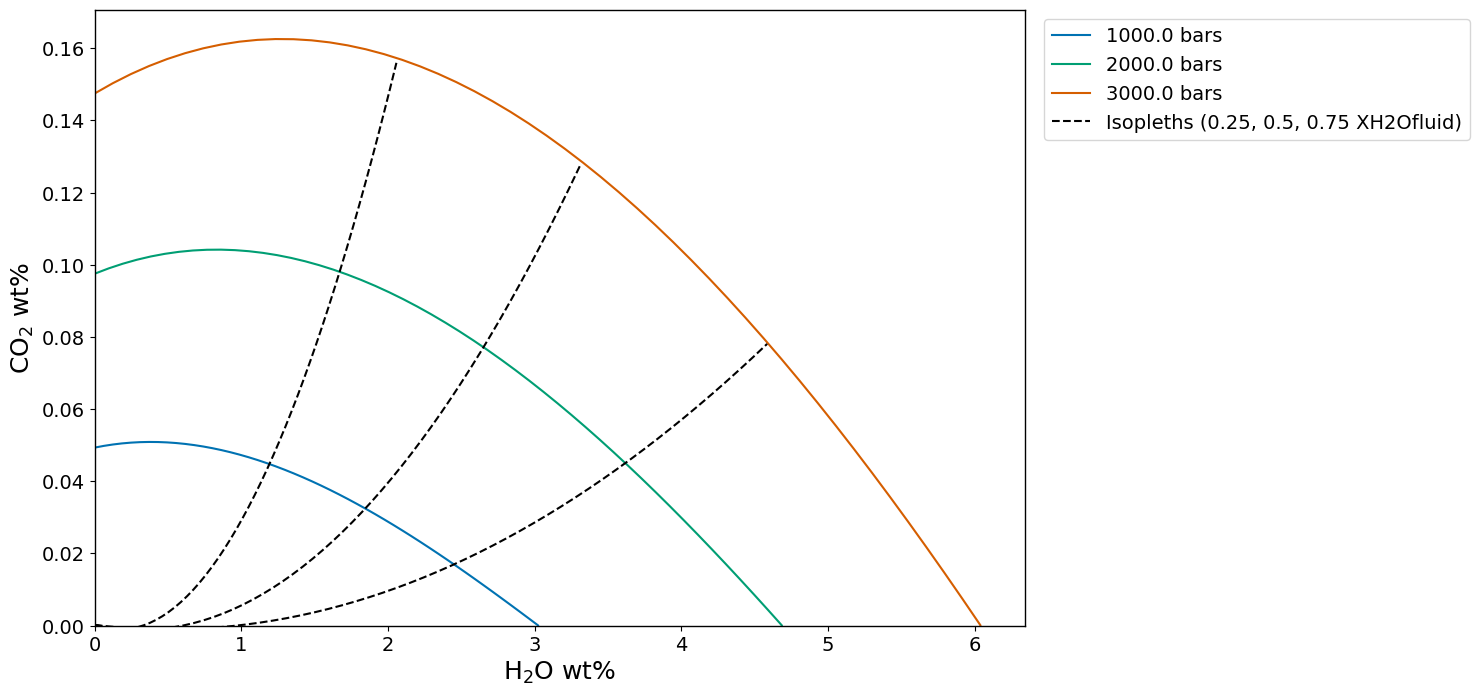

In [ ]:
fig, ax = v.plot(isobars=isobars, isopleths=isopleths)
v.show()

### A simple example: Degassing paths
Here we plot all four degassing paths calculated for sample '10*' at 1,200 $^{\circ}$C in Section 3.7 onto one plot. We designate labels of "Open", "Half", "Closed", and "Exsolved" for the legend.

**Figure 7**

Figure 7a

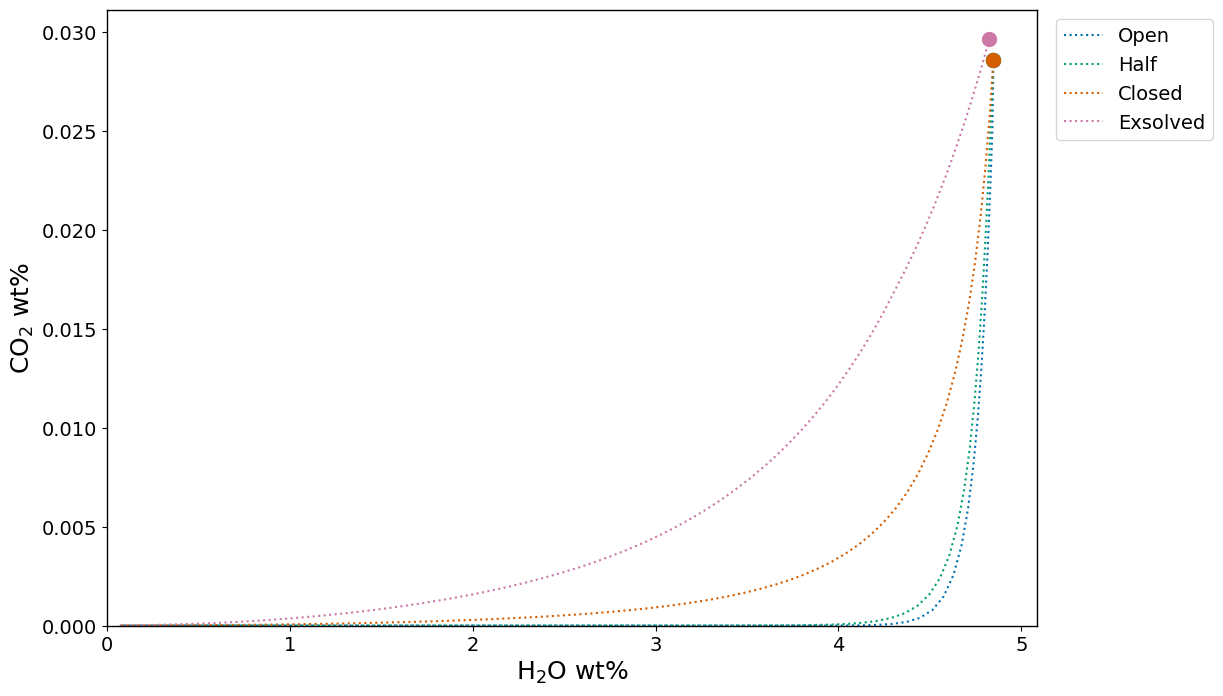

In [ ]:
fig, ax = v.plot(degassing_paths=[open_df, half_df, closed_df, exsolved_df],
            degassing_path_labels=["Open", "Half", "Closed", "Exsolved"])
v.show()

Figure 7b

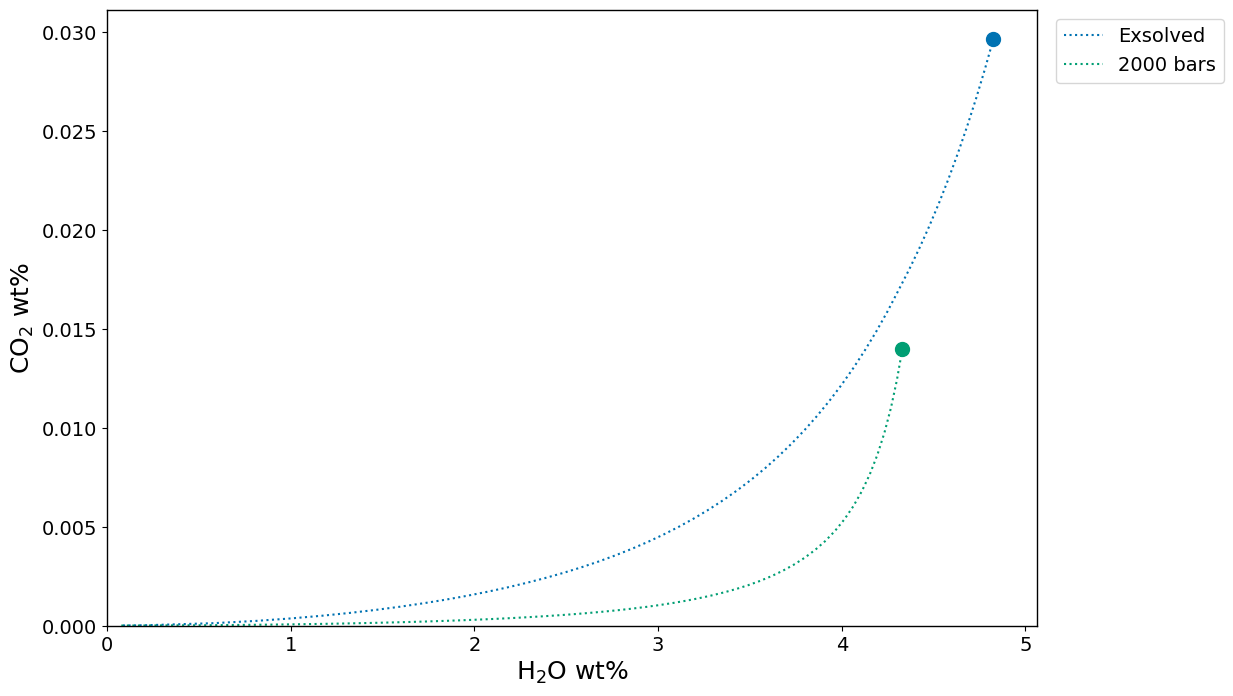

In [ ]:
fig, ax = v.plot(degassing_paths=[exsolved_df, start2000_df],
            degassing_path_labels=["Exsolved", "2000 bars"])
v.show()

*Figure 7 - Degassing paths calculated for the sample, temperature, degassing style, initial exsolved fluid wt%, starting pressure, and model as designated in Section 3.6. Default manuscript values are sample* `10*` *at 1,200 °C. "Open", "Half", and "Closed" curves in (a) represent open-system, partially open-system (50% fractionated fluid), and closed-system degassing paths, respectively, starting at the saturation pressure. The "Exsolved" curve in (b) represents closed-system degassing with an initial exsolved fluid wt% = 2.0. The "2000" curve in (b) represents closed-system degassing calculated starting at a pressure of 2,000 bars.*

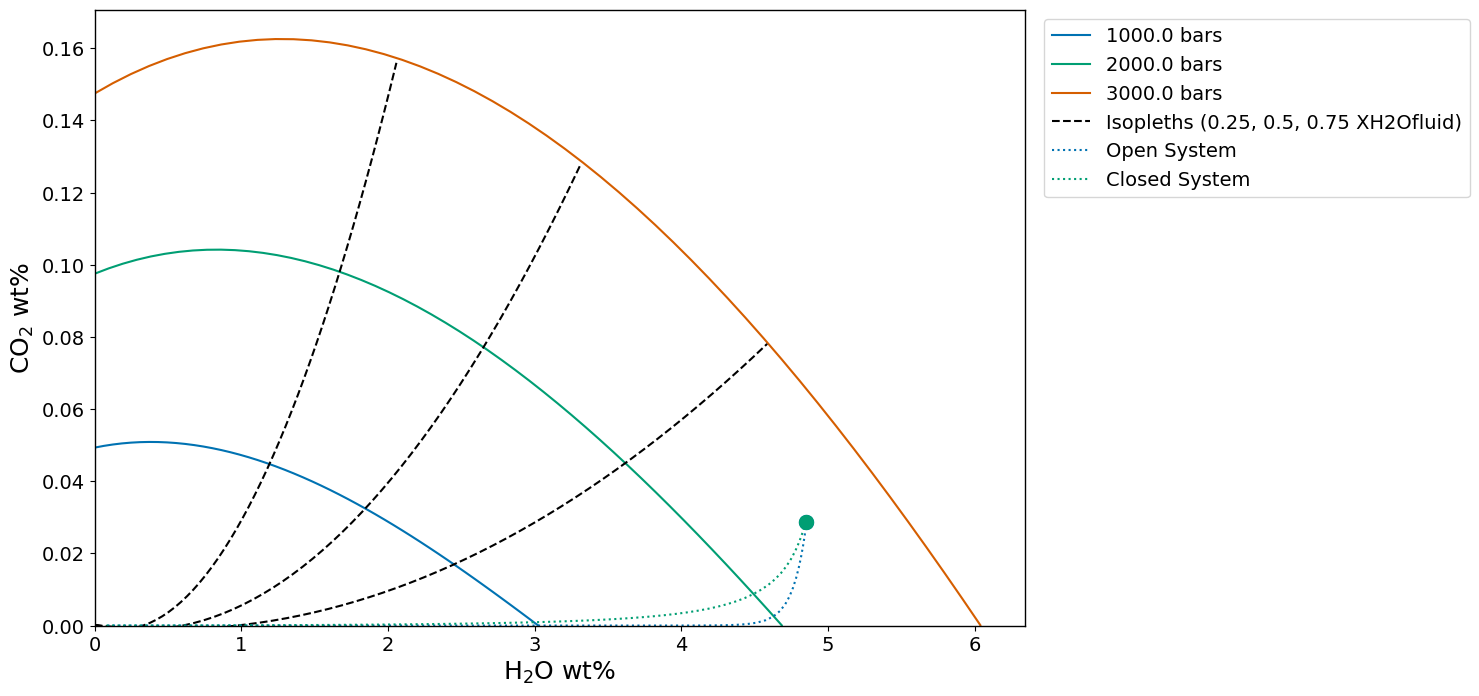

In [ ]:
fig, ax = v.plot(isobars=isobars, 
                   isopleths=isopleths, 
                   degassing_paths=[open_df, closed_df], 
                   degassing_path_labels=["Open System", "Closed System"])
v.show()

*Figure 8 - Example of plotting multiple calculations on one plot. Isobars and isopleths as defined in Section 3.6 and shown in Section 3.8.1 and degassing curves as defined in Section 3.7 and shown in Section 3.8.2. Default manuscript values are for sample* `10*` *at 1,200 °C with isobars at 1,000, 2,000, and 3,000 bars, isopleths at XH$_2$O$^{fluid}$ values of 0, 0.25, 0.5, 0.75, and 1 with an open-system and a closed-system degassing path.*

#### Isobars, isopleths, and degassing paths for multiple samples

First, we will calculate some new data for two different samples: a basanite (sample KI-07 from Iacovino et al., 2016) and a rhyolite (sample samp. P1968a from Myers et al., 2019). For both samples we will calculate and then plot:
- Isobars and isopleths at 1100 $^{\circ}$C, pressures of 1,000 and 2,000 bars and fluid compositions of XH$_2$O$^{fluid}$ of 0.25, 0.5, and 0.75
- Closed-system degassing paths at 1100 $^{\circ}$C

In [ ]:
basanite_sample = myfile.get_sample_composition('KI-07', asSampleClass=True)
rhyolite_sample = myfile.get_sample_composition('samp. P1968a', asSampleClass=True)

basanite_isobars, basanite_isopleths = v.calculate_isobars_and_isopleths(sample=basanite_sample,
                                                                         temperature=1100,
                                                                         pressure_list=[1000, 2000],
                                                                         isopleth_list=[0.25,0.75]).result

rhyolite_isobars, rhyolite_isopleths = v.calculate_isobars_and_isopleths(sample=rhyolite_sample, 
                                                                         temperature=1100, 
                                                                         pressure_list=[1000, 2000],
                                                                         isopleth_list=[0.25,0.75]).result

basanite_degassing_path = v.calculate_degassing_path(sample=basanite_sample,
                                                     temperature=1100).result

rhyolite_degassing_path = v.calculate_degassing_path(sample=rhyolite_sample,
                                                    temperature=1100).result

Calculating isobar at 1000 bars
 done.                                                                                                                           
Calculating isobar at 2000 bars
 done.                                                                                                                           
Done!
Calculating isobar at 1000 bars
 done.                                                                                                                           
Calculating isobar at 2000 bars
 done.                                                                                                                           
Done!
Finding saturation point... duanDriver-2: t = 1373.15, p = 17000, z = 2.90354, v = 1.94998, delv = 0, dx = -3.19325e-14, iter = 43
duanDriver-2: t = 1373.15, p = 9000, z = 2.00845, v = 2.54783, delv = 0, dx = -4.11582e-14, iter = 42
[====================] 100% Calculating degassing path...
[====================] 100% Calculating degassing

**Figure 9**

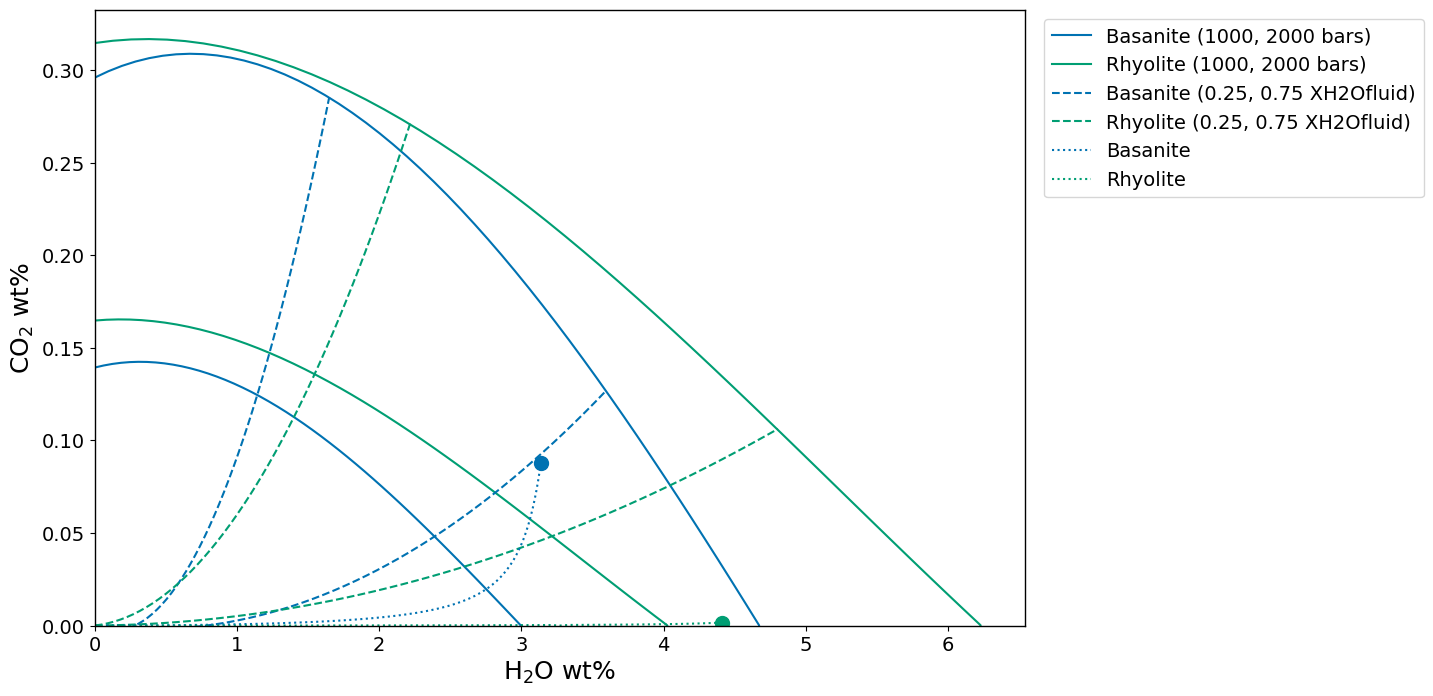

In [ ]:
fig, ax = v.plot(isobars=[basanite_isobars, rhyolite_isobars],
                  isopleths=[basanite_isopleths, rhyolite_isopleths],
                  degassing_paths=[basanite_degassing_path, rhyolite_degassing_path],
                  isobar_labels=["Basanite", "Rhyolite"],
                  isopleth_labels=["Basanite", "Rhyolite"],
                  degassing_path_labels=["Basanite", "Rhyolite"])
v.show()

*Figure 9 - Example of plotting multiple calculations from multiple samples on the same plot. Note that the colors are automatically set to correspond to each sample for all plotted items (here, isobars, isopleths, and degassing paths). Samples, pressures, temperatures, XH$_2$O$^{fluid}$ values, and degassing path styles are defined above in this section. Manuscript default values are for a basanite (sample* `KI-07` *) and a rhyolite (sample* `samp. P1968a` *) at 1,100 °C, 1,000 and 2,000 bars, and XH$_2$O$^{fluid}$ = 0.25 and 0.75 and closed-system degassing.*

Here we save five of the calculations performed on an imported data file earlier in this manuscript. The original user-input data are stored in the BatchFile object 'myfile'. In the following line we use the method `save_excel()` to save the original data and a list of calculations given by the calculations argument to an Excel file.

In [ ]:
myfile.save_excel(filename='testsave.xlsx', 
                      calculations=[dissolved, eqfluid, eqfluid_wtemps, satPs, satPs_wtemps],
                      sheet_names=['dissolved', 'eqfluid', 'eqfluid_wtemps', 'SaturationPs', 'SatPs_wtemps'])

NameError: name 'satPs_wtemps' is not defined

**Table 12. Melt compositions used for modeling**

In [ ]:
model_comps = v.BatchFile("tables/Table_Model_Comps.xlsx")
model_comps.data

,SiO2,TiO2,Al2O3,Fe2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,H2O,CO2
Alkali Basalt,49.00,1.27,19.7,3.74,5.33,0.17,4.82,8.85,4.23,1.00,0.37,4.51,0.25
Rhyolite,77.19,0.06,12.8,0.00,0.94,0.00,0.03,0.53,3.98,4.65,0.00,0.26,0.05


In [ ]:
alkbasalt = model_comps.get_sample_composition("Alkali Basalt", asSampleClass=True)
rhyolite = model_comps.get_sample_composition("Rhyolite", asSampleClass=True)

alkbasalt_isobars, alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, 
                                                                           temperature=1200, pressure_list=[500, 1000, 2000], 
                                                                           isopleth_list=[0.5], 
                                                                           print_status=True).result

rhyolite_isobars, rhyolite_isopleths = v.calculate_isobars_and_isopleths(sample=rhyolite, 
                                                                         temperature=800, 
                                                                         pressure_list=[500, 1000, 2000], 
                                                                         isopleth_list=[0.5]).result

Iac_alkbasalt_isobars, Iac_alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, 
                                                                                   temperature=1200, 
                                                                                   pressure_list=[500, 1000, 2000], 
                                                                                   isopleth_list=[0.5], 
                                                                                   model="IaconoMarziano").result

Dixon_alkbasalt_isobars, Dixon_alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, 
                                                                                       temperature=1200, 
                                                                                       pressure_list=[500, 1000, 2000], 
                                                                                       isopleth_list=[0.5], 
                                                                                       model="Dixon").result

Shish_alkbasalt_isobars, Shish_alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, 
                                                                                       temperature=1200, 
                                                                                       pressure_list=[500, 1000, 2000], 
                                                                                       isopleth_list=[0.5], 
                                                                                       model="ShishkinaIdealMixing").result

Liu_rhyolite_isobars, Liu_rhyolite_isopleths = v.calculate_isobars_and_isopleths(sample=rhyolite, 
                                                                                 temperature=800, 
                                                                                 pressure_list=[500, 1000, 2000], 
                                                                                 isopleth_list=[0.5], 
                                                                                 model="Liu").result

Calculating isobar at 500 bars
 done.                                                                                                                           
Calculating isobar at 1000 bars
 done.                                                                                                                           
Calculating isobar at 2000 bars
 done.                                                                                                                           
Done!
Calculating isobar at 500 bars
 done.                                                                                                                           
Calculating isobar at 1000 bars
 done.                                                                                                                           
Calculating isobar at 2000 bars
 done.                                                                                                                           
Done!


/opt/anaconda3/envs/VESIcal-base/lib/python3.10/site-packages/VESIcal/calculate_classes.py:60: RuntimeWarning: pressure exceeds 1000 bar, which Iacono-Marziano et al. (2012) suggest as an upper calibration limit of the Dixon (1997, Pi-SiO2 simpl.) Model, 
  w.warn(self.calib_check, RuntimeWarning)


**Figure 13**

Figure 13a

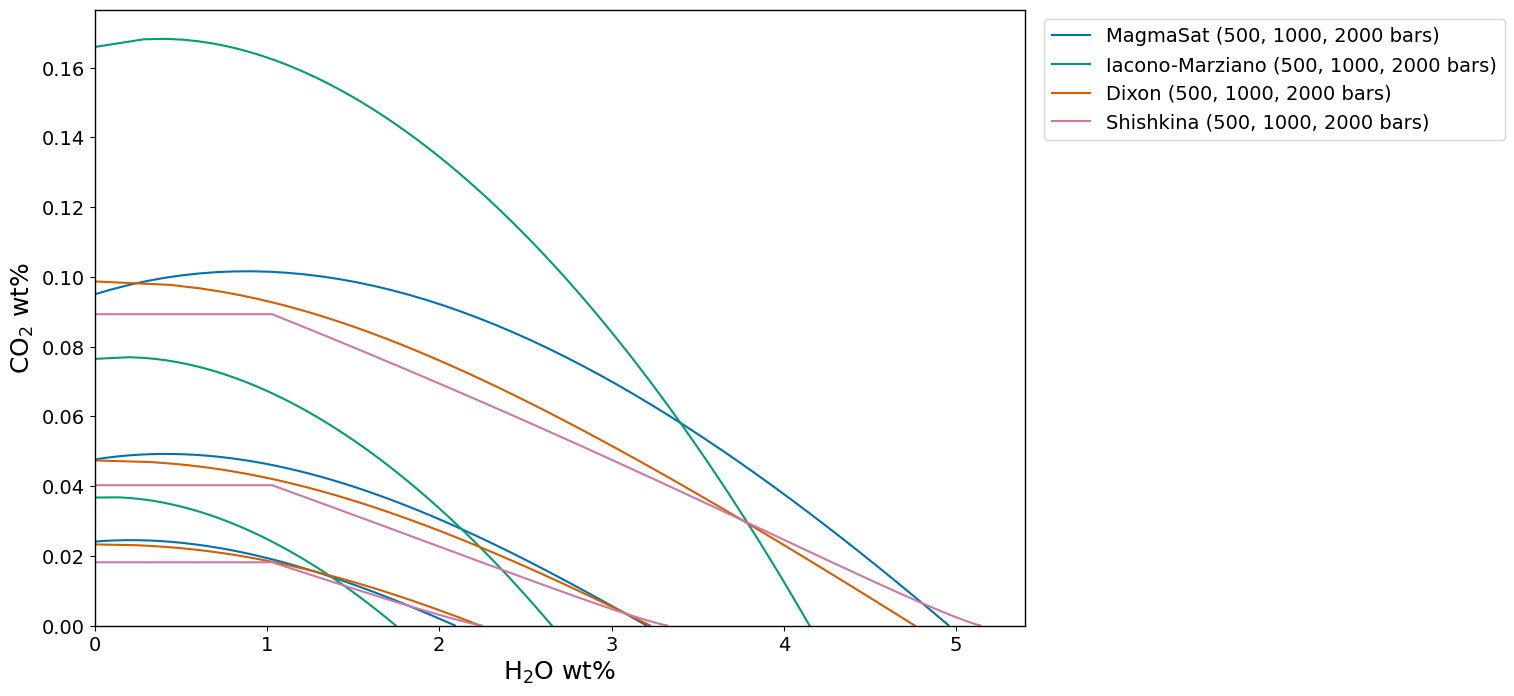

In [ ]:
fig, ax = v.plot(isobars=[alkbasalt_isobars, Iac_alkbasalt_isobars, Dixon_alkbasalt_isobars, Shish_alkbasalt_isobars], 
                 isobar_labels=["MagmaSat", "Iacono-Marziano", "Dixon", "Shishkina"])
v.show()

Figure 13b

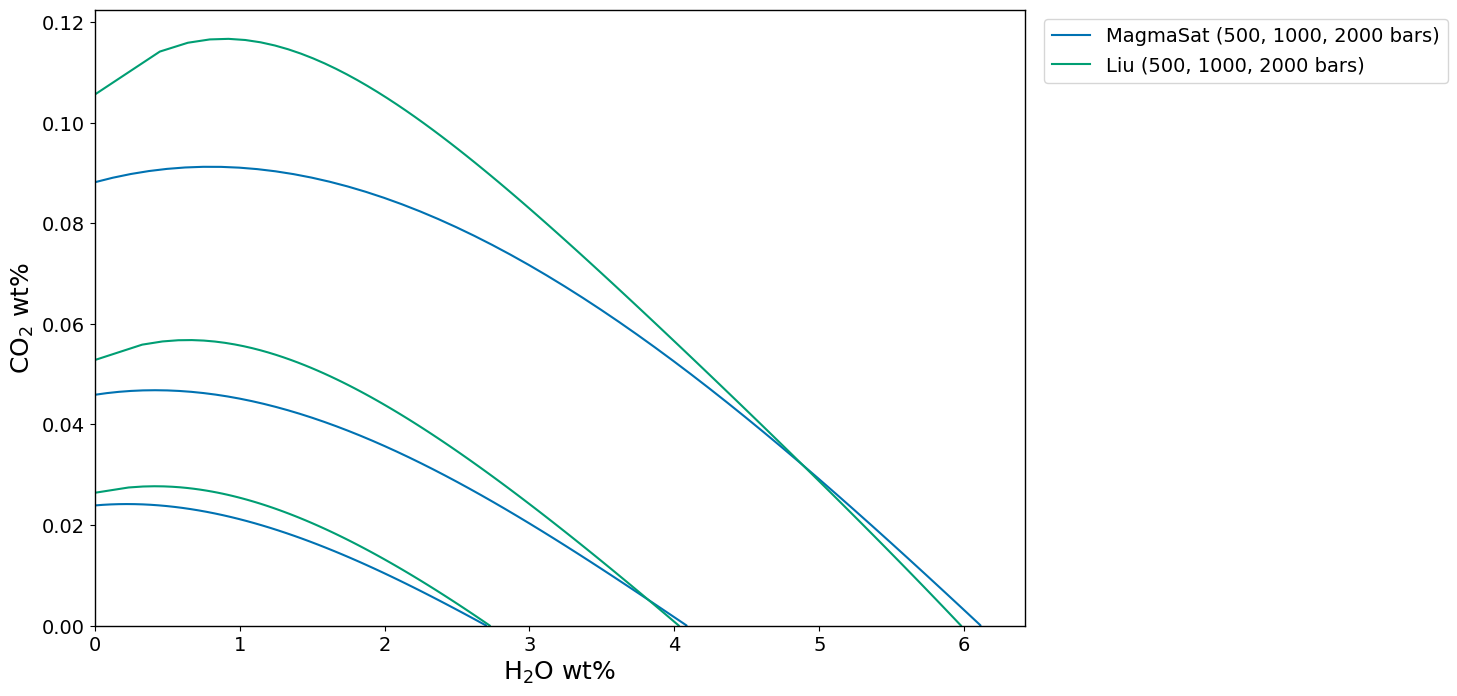

In [ ]:
fig, ax = v.plot(isobars=[rhyolite_isobars, Liu_rhyolite_isobars], isobar_labels=["MagmaSat", "Liu"])
v.show()

*Figure 13: Isobars plotted for an alkali basalt (a) and rhyolite (b) with VESIcal for five mixed-fluid solubility models. For alkali basalt, MagmaSat, Iacono-Marziano, Dixon, and ShishkinaIdealMixing were used to create isobars at 1,200 °C. For rhyolite, MagmaSat and Liu were used to create isobars at 800 °C.*

## Code for saving pickle files of the dataframes created in this manuscript.
These are then called in the unittest routines.

In [ ]:
closed_df.to_pickle("manuscript_closed.p")
dissolved.to_pickle("manuscript_dissolved.p")
eqfluid_mol.to_pickle("manuscript_eqfluid_mol.p")
eqfluid_wt.to_pickle("manuscript_eqfluid_wt.p")
eqfluid_wtemps.to_pickle("manuscript_eqfluid_wtemps.p")
eqfluid.to_pickle("manuscript_eqfluid.p")
exsolved_df.to_pickle("manuscript_exsolved_df.p")
half_df.to_pickle("manuscript_half_df.p")
isobars.to_pickle("manuscript_isobars.p")
isopleths.to_pickle("manuscript_isopleths.p")
open_df.to_pickle("manuscript_open_df.p")
satPs_wtemps.to_pickle("manuscript_satPs_wtemps.p")
satPs.to_pickle("manuscript_satPs.p")
start2000_df.to_pickle("manuscript_start2000_df.p")